In [10]:
import numpy as np
from pandas import read_csv
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

df0 = read_csv('Flow_meter_27-2_96pwm_16-02-25.csv', delim_whitespace=True, header=0 ).to_numpy()
df1 = read_csv('Flow_meter_17-5_144pwm_16-05-19.csv', delim_whitespace=True, header=0 ).to_numpy()
df2 = read_csv('Flow_meter_9-0_225pwm_16-06-45.csv', delim_whitespace=True, header=0 ).to_numpy()
df3 = read_csv('Flow_meter_17-6_205pwm_6469fps21-03-58.csv', delim_whitespace=True, header=0 ).to_numpy()
df4 = read_csv('Flow_meter_17-6_205pwm_2000fps18-44-23.csv', delim_whitespace=True, header=0 ).to_numpy()
df5 = read_csv('Flow_meter_9-0_225pwm_16-26-04.csv', delim_whitespace=True, header=0 ).to_numpy()
df6 = read_csv('Flow_meter_13-1_174pwm_4000fps17-32-33.csv', delim_whitespace=True, header=0 ).to_numpy()
df7 = read_csv('Flow_meter_13-1_174pwm_6469fps17-15-19.csv', delim_whitespace=True, header=0 ).to_numpy()
df8 = read_csv('Flow_meter_17-5_225pwm_2000fps16-45-17.csv', delim_whitespace=True, header=0 ).to_numpy()
df9 = read_csv('Flow_meter_17-6_144pwm_2000fps18-45-50.csv', delim_whitespace=True, header=0 ).to_numpy()
df10 = read_csv('Flow_meter_17-6_144pwm_2205cyc18-36-59.csv', delim_whitespace=True, header=0 ).to_numpy()
df11 = read_csv('Flow_meter_17-6_180pwm_2000fps18-41-04.csv', delim_whitespace=True, header=0 ).to_numpy()
df12 = read_csv('Flow_meter_17-6_190pwm_2000fps18-43-42.csv', delim_whitespace=True, header=0 ).to_numpy()
df13 = read_csv('Flow_meter_17-6_200pwm_2000fps18-44-02.csv', delim_whitespace=True, header=0 ).to_numpy()
df14 = read_csv('Flow_meter_17-6_210pwm_2000fps18-44-42.csv', delim_whitespace=True, header=0 ).to_numpy()

df15 = read_csv('Flow_meter_9-0_100pwm_6469fps_20-38-16.csv', delim_whitespace=True, header=0 ).to_numpy()
df16 = read_csv('Flow_meter_9-0_100pwm_6469fps_20-33-18_edited.csv', delim_whitespace=True, header=0 ).to_numpy()
#df17 = read_csv('', delim_whitespace=True, header=0 ).to_numpy()
#df18 = read_csv('', delim_whitespace=True, header=0 ).to_numpy()

mmppix = 0.007142
df_arr = [df0, df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11,df12,df13,df14]


In [8]:
def plot_time_index(df_arr, index):
    df_count = 0
    for df in df_arr:
        time_acc = 0
        plot_arr=np.zeros((len(df),2))
        for i in range(len(df)):
            dt = df[i,0] / 1_000
            plot_arr[i,0] = time_acc
            plot_arr[i,1] = df[i,index]
            time_acc += dt
        plt.plot(plot_arr[:,0],
            plot_arr[:,1],
            linewidth = 1,
            #s = .25,
            marker=".",
            label = str(df_count))
        df_count += 1
    #plt.legend()
    plt.ylabel('pix displacement')
    plt.xlabel('time (ms)')
    #plt.ylim(400,500)
    plt.grid()
    plt.show()

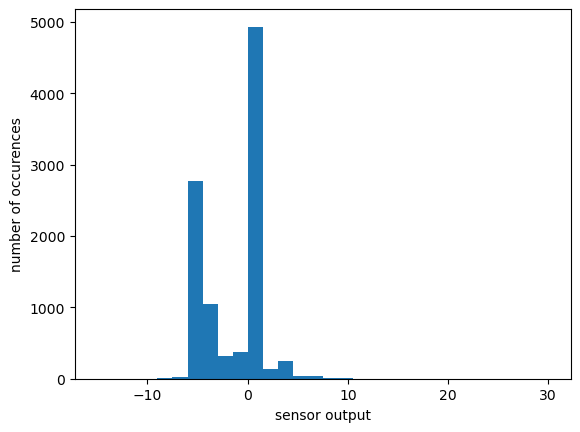

In [24]:
counts, bins = np.histogram(df16[:,1], bins=30, range=(-15,30))
plt.hist(bins[:-1], bins, weights=counts)
plt.ylabel('number of occurences')
plt.xlabel('sensor output')
plt.show()

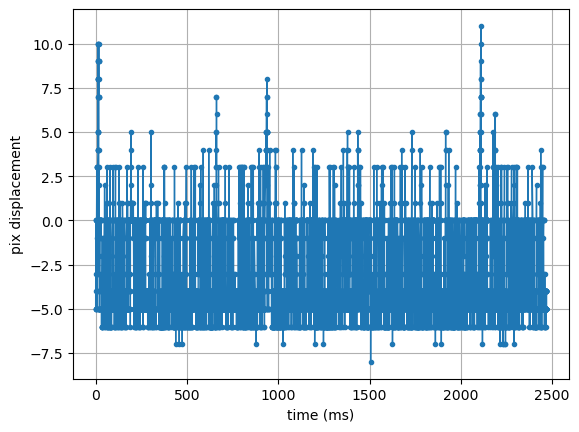

In [21]:
plot_time_index([df15],1)

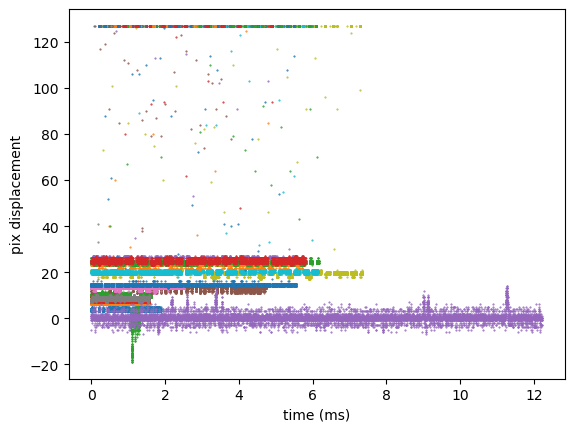

In [155]:
plot_time_index(df_arr,2)

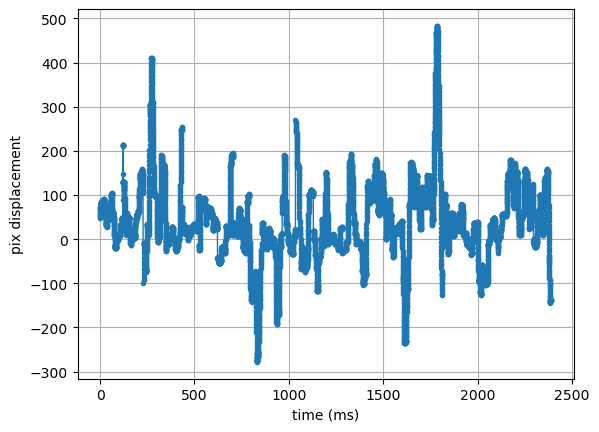

In [18]:
plot_time_index([df16],6)

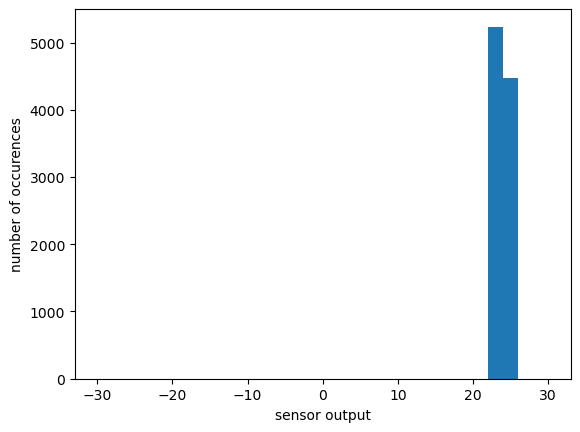

In [24]:
counts, bins = np.histogram(df11[:,2], bins=30, range=(-30,30))
plt.hist(bins[:-1], bins, weights=counts)
plt.ylabel('number of occurences')
plt.xlabel('sensor output')
plt.show()

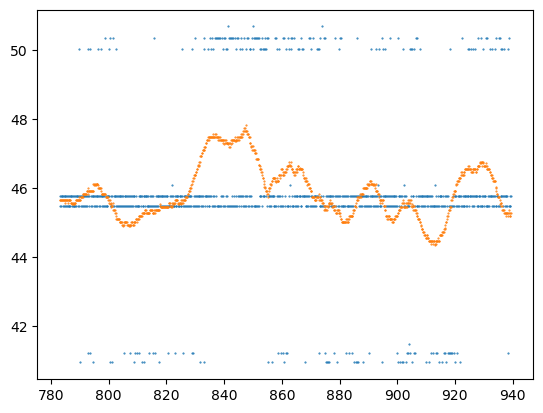

In [78]:
df = df2
index = 2
time_acc = 0
N = 50

plot_arr=np.zeros((len(df),2))
start_i, plot_len = 5000,1000
for i in range(len(df)):
    dt = df[i,0] / 1_000
    plot_arr[i,0] = time_acc
    plot_arr[i,1] = 0.7142 * df[i,index]/dt
    time_acc += dt

smoothed_x = np.convolve(plot_arr[:,1], np.ones(N)/N, mode='valid')

plt.scatter(plot_arr[start_i:start_i+plot_len,0],
    plot_arr[start_i:start_i+plot_len,1],
    linewidth = 1,
    s = .25)

plt.scatter(plot_arr[start_i:start_i+plot_len,0],smoothed_x[start_i:start_i+plot_len] ,
    linewidth = 1,
    s = .25)
plt.show()
